In [4]:
library(ISLR2)
library(MASS)


Attaching package: 'MASS'


The following object is masked from 'package:ISLR2':

    Boston




In [6]:
help(lda)

lda                    package:MASS                    R Documentation

_L_i_n_e_a_r _D_i_s_c_r_i_m_i_n_a_n_t _A_n_a_l_y_s_i_s

_D_e_s_c_r_i_p_t_i_o_n:

     Linear discriminant analysis.

_U_s_a_g_e:

     lda(x, ...)
     
     ## S3 method for class 'formula'
     lda(formula, data, ..., subset, na.action)
     
     ## Default S3 method:
     lda(x, grouping, prior = proportions, tol = 1.0e-4,
         method, CV = FALSE, nu, ...)
     
     ## S3 method for class 'data.frame'
     lda(x, ...)
     
     ## S3 method for class 'matrix'
     lda(x, grouping, ..., subset, na.action)
     
_A_r_g_u_m_e_n_t_s:

 formula: A formula of the form 'groups ~ x1 + x2 + ...'  That is, the
          response is the grouping factor and the right hand side
          specifies the (non-factor) discriminators.

    data: An optional data frame, list or environment from which
          variables specified in 'formula' are preferentially to be
      

In [7]:
lda_fit <- lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = Year < 2005)

In [8]:
lda_fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = Year < 
    2005)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

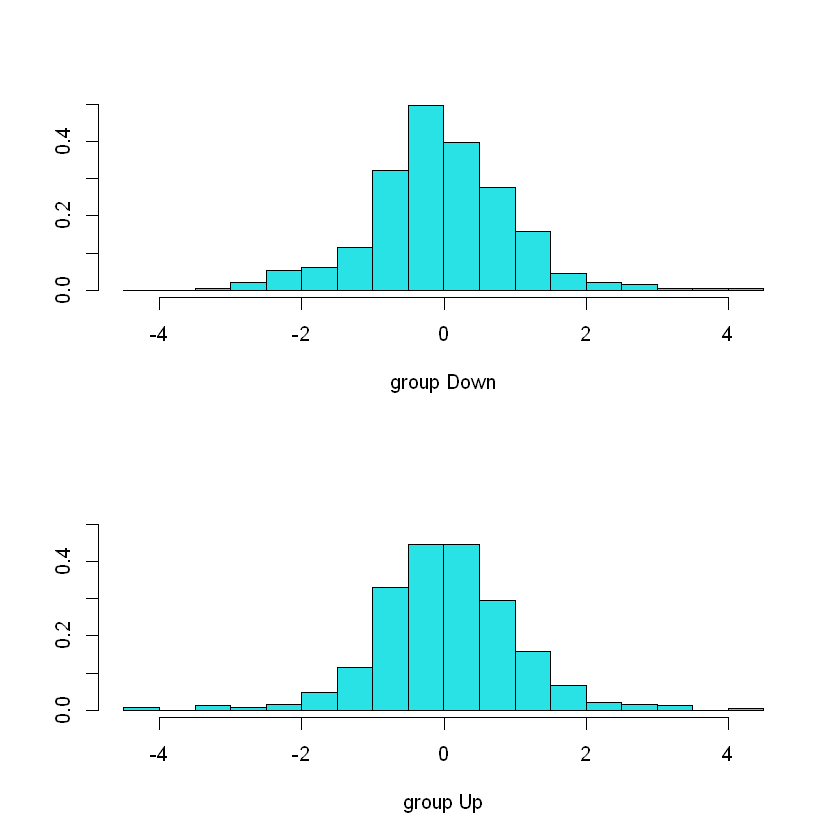

In [9]:
plot(lda_fit)

In [11]:
smarket_2005 <- subset(Smarket, Year == 2005)

In [12]:
lda_pred <- predict(lda_fit, smarket_2005)

In [16]:
class(lda_pred)

[1] "list"

In [17]:
data.frame(lda_pred)[1:5,]

,class,posterior.Down,posterior.Up,LD1
,<fct>,<dbl>,<dbl>,<dbl>
999,Up,0.4901792,0.5098208,0.08293096
1000,Up,0.4792185,0.5207815,0.59114102
1001,Up,0.4668185,0.5331815,1.16723063
1002,Up,0.4740011,0.5259989,0.83335022
1003,Up,0.4927877,0.5072123,-0.03792892


In [19]:
table(lda_pred$class, smarket_2005$Direction)

      
       Down  Up
  Down   35  35
  Up     76 106

In [20]:
mean(lda_pred$class == smarket_2005$Direction)

[1] 0.5595238